# **Unit 1 Assignment: Topics 1-3**

## *DATA 5420/6420*
## Name: Dallin Moore

For this first assignment I want you to spend some time thinking about a dataset you might want to work with throughout the semester to build something cool! This could be a personal project, something you build for someone else, or maybe even the start of a business -- get creative!

Once you have selected your dataset or data source, I want you to apply the skills you've learned from Unit 1 (topics 1-3), including finding and loading a data source, describing and understanding your text data, and then cleaning/preprocessing your data to prep it for feature engineering!

We of course aren't ready to begin critically analyzing your text yet, but use this as an opportunity to explore different sources of text, consider what you'd be interested in building something around, and start jogging ideas of how you'd like to see this project progress throughout the semester.

**If you are in the 5420 (undergraduate) section of this course**, you may choose a dataset that has been precompiled from a source like [Kaggle](https://www.kaggle.com/datasets?tags=13204-NLP), though you are not constrained to this source!

**If you are in the 6420 (graduate) section of this course**, I'd like you to source your text data from an API or scraping, or if you have data from work/another personal project, that's fine too.

**If you use ChatGPT or other LLMs (which I highly encourage) -- share your prompts in the template -- I'd love to see your approach!**


> *Throughout this assignment I will ask you to provide comments in your code that indicate what each step/line is doing. This is a great habit to get into to not only make sure you know what's going on as you're learning new code, but to also ensure that anyone else who might access your code in the future can read it and understand your process! You will be docked points if you fail to include this documentation!*

## **Import Dependencies \& Packages**

In [1]:
import nltk, re, pprint

!pip install contractions
import contractions                                                                                             # contractions dictionary
from string import punctuation

import spacy                                                                                                    # used for lemmatization/stemming

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
tokenizer = ToktokTokenizer()                                                                                   # stopword removal
from nltk import word_tokenize

import pandas as pd
import numpy as np                                                                                              # general packages for data manipulation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.8 MB/s eta 0:00:00


## **Part 1: Selecting \& Importing a Data Source**

Remember, if you are in the DATA 6420 section, your data needs to be sourced from either: an API or web-scraping (or if you have data from work/personal project already, that's fine too).

In [8]:
# import data                                                          there are a couple of errors in the csv so these lines will be skipped
df = pd.read_csv("/content/Spotify Million Song Dataset_exported.csv")
df.head()

,artist,song,link,text
0,ABBA,She's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [9]:
# the link column will be removed as we don't need the text that it contains
del df['link']
df.head()

,artist,song,text
0,ABBA,She's My Kind Of Girl,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante","Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...


**What was your motivation for choosing this data set/source?**

I've always beenintrigued by Spotify's analytics, primarily showcased at the end of the year with Spotify Wrapped. When I found a dataset from songs on Spotify I was curious what I could do with so much data.

**I imagine you're still work-shopping a plan, but what are some interesting things you hope to do with this data going forward in the class?**

I don't have a single idea nailed down yet, but a couple of my ideas include:

* create song summary from lyrics to pair similar songs
* identify the theme of the song
* identify emotion of the song
* identify song genre in order to categorize songs
* identify rhyming
* explore lyric patterns specific to artists

**Description Card:**

* **License**: Open Data Commons
* **Contributer**: Joakim Arvidsson
* **Source**: Spotify
* **Data Collection**: 01/22/2024

## **Part 2: Cleaning \& Preprocessing the Dataset**

As applicable apply any necessary cleaning to your dataset in this next step, thinking things like special character removal, HTML parsing, etc.

In [11]:
# Function to clean and preprocess the datasets
def cleaning(df, text_column):
  cleaned_df = df.copy()
  def clean_text(text):
    # Remove special characters and line breaks
    text = re.sub(r'\s+', ' ', text)

    # Remove punctuation (excluding single quotes)
    text = re.sub(r'[^\w\s\']', '', text)

    return text

  # Apply the cleaning function to the specified text column
  cleaned_df[text_column] = cleaned_df[text_column].apply(clean_text)

  return cleaned_df


cleaned_df = cleaning(df, 'text')
cleaned_df['text'].head()

0    Look at her face it's a wonderful face And it ...
1    Take it easy with me please Touch me gently li...
2    I'll never know why I had to go Why I had to p...
3    Making somebody happy is a question of give an...
4    Making somebody happy is a question of give an...
Name: text, dtype: object

**Describe any cleaning steps you applied to your data**

The data is already very clean, but it does '\n' signifying new lines that can be removed as well as punctuation excluding the single quote denoting contractions.

**Now let's consider what preprocessing steps may or may not be necessary for your given dataset -- maybe even thinking ahead to what you plan to do with your data later on...**

**Which of the following preprocessing steps will you apply to your data (at least for now)?**



*   Casefolding
*   Contraction Expansion
*   Stopword removal
*   Lemmatization
*   Stemming
*   Other?

**Explain which you choose to apply and why, as well as which you are choosing to not apply and why.**

If I want to look at rhyming or lyrical patterns later, I will want as much of the data as possible to be in tact (including original words, line breaks, etc.), but for identifying theme and emotion in the text, casefolding, contraction expansion, stopword removal, lemmatization, and stemming will all be useful in denoting what words come up frequently and what can be removed. Especially for contraction expansion, this will help with frequency and  assist with identifying theme.

In [16]:
nltk.download('stopwords')
def preprocess_dataframe(df, text_column):
    # Load spaCy language model with lemmatization
    nlp = spacy.load("en_core_web_sm")

    # Define a function for lemmatization
    def lemmatize_text(text):
        doc = nlp(text)
        return ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in doc])

    # Define the preprocessing function
    def preprocess_text(text):
        # Casefolding
        text = text.lower()

        # Contraction expansion
        contractions = {"don't": "do not", "can't": "cannot", "let's": "let us", "'s": " is"}
        for contraction, expansion in contractions.items():
            text = re.sub(fr'\b{contraction}\b', expansion, text)

        # Lemmatization using spaCy
        text = lemmatize_text(text)

        # Tokenization and stemming using spaCy
        doc = nlp(text)
        preprocessed_tokens = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stopwords.words('english')]
        preprocessed_text = ' '.join(preprocessed_tokens)

        return preprocessed_text

    # Copy the original DataFrame to avoid modifying it in place
    preprocessed_df = df.copy()

    # Apply the preprocessing function to the specified text column
    preprocessed_df[text_column] = preprocessed_df[text_column].apply(preprocess_text)

    return preprocessed_df


nlp = spacy.load("en_core_web_sm")

# Preprocess the 'text' column - due to cpu constraints (and probably my python knowledge), only 1000 rows can
preprocessed_df = preprocess_dataframe(cleaned_df.head(1000), 'text')
preprocessed_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,artist,song,text
0,ABBA,She's My Kind Of Girl,look face wonderful face mean something specia...
1,ABBA,"Andante, Andante",take easy I please touch I gently like summer ...
2,ABBA,As Good As New,I never know I go I put lousy rotten show boy ...
3,ABBA,Bang,make somebody happy question give take learn s...
4,ABBA,Bang-A-Boomerang,make somebody happy question give take learn s...


## **Part 3: A bit of Text Exploration**

Spend some time exploring your data by looking at text statistics and text visualization (frequency distribution plot or word cloud, etc.)

In [20]:
# text statistics -- e.g. total number of words, total unique words, lexical diversity, top most frequent words, etc.
from sklearn.feature_extraction.text import CountVectorizer

def most_common_word_by_artist(df, text_column, artist_column):
    # Combine the preprocessed texts for each artist
    artist_texts = df.groupby(artist_column)[text_column].apply(lambda x: ' '.join(x)).reset_index()

    # Tokenize and count the occurrences of each word
    vectorizer = CountVectorizer(stop_words='english')  # Use 'english' stop words
    X = vectorizer.fit_transform(artist_texts[text_column])

    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame with word counts for each artist
    word_counts_df = pd.DataFrame(X.toarray(), columns=feature_names)
    word_counts_df[artist_column] = artist_texts[artist_column]

    # Display the most common word for each artist
    for index, row in artist_texts.iterrows():
        artist = row[artist_column]
        artist_word_counts = word_counts_df[word_counts_df[artist_column] == artist].drop(columns=[artist_column])
        total_word_counts = artist_word_counts.sum(axis=0)
        most_common_word = total_word_counts.idxmax()

        # Display the results
        print(f"{artist}: {most_common_word}")



print('Most common words used for each artist')
most_common_word_by_artist(preprocessed_df, 'text', 'artist')

Most common words used for each artist
ABBA: la
Ace Of Base: stop
Adam Sandler: cow
Adele: light
Aerosmith: yeah
Air Supply: love
Aiza Seguerra: na
Alabama: love
Alan Parsons Project: know
Aled Jones: bring
Alice Cooper: want
Alice In Chains: yeah
Alison Krauss: love
Allman Brothers Band: know
Alphaville: people
America: know
Amy Grant: love
Andrea Bocelli: love
Andy Williams: love
Annie: uh
Ariana Grande: baby
Ariel Rivera: love
Arlo Guthrie: turn
Arrogant Worms: like
Avril Lavigne: na
Backstreet Boys: love


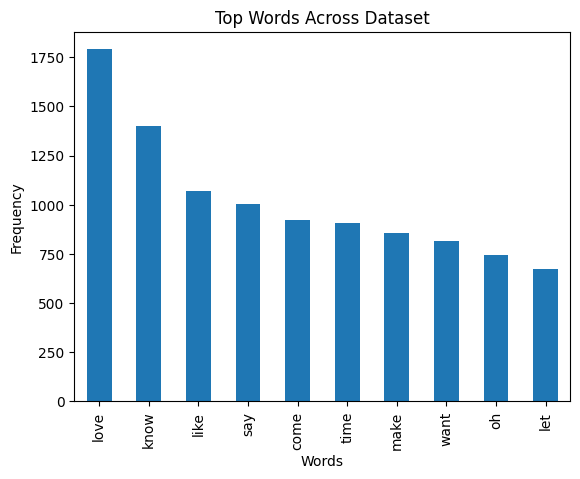

In [21]:
import matplotlib.pyplot as plt

def plot_top_words_across_dataset(df, text_column):
    # Tokenize and count the occurrences of each word
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(df[text_column])

    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame with word counts for the entire dataset
    word_counts_df = pd.DataFrame(X.toarray(), columns=feature_names)

    # Calculate total word counts
    total_word_counts = word_counts_df.sum(axis=0)

    # Get the top 10 most common words
    top_words = total_word_counts.sort_values(ascending=False).head(10)

    # Plot a bar chart for the top words
    top_words.plot(kind='bar', title="Top Words Across Dataset")
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

plot_top_words_across_dataset(preprocessed_df, 'text')

**What insights have you gained through exploring your text with some basic text statistics and visualizations?**

By just looking at what the most common word used was, we can guess their genre. Though this mostly just means that we can assume those with their top word as 'love' sing love songs. Although this is using very limited data to make generalizations, it could be useful.

**Are there any changes you'd make to the way you preprocessed your text based on your findings? E.g. a custom stop-word list**

words without meaning that are common in songs are words like 'oh'  and 'la'. ommitting these words would make our conclusions even more insightful. Even the rest of the words after 'love' in my dataset don't have much meaning so I might look at ommitting more of them.

**Now that you've chosen and explored a data set/source, what will your next step be to progress this project? (Not for you to do now, but just thinking ahead).**

I need to figure out how to preprocess all of the data. When I tried with my same function on all 57,000 rows, I left it for an hour and it was not complete. However, when I ran it on 1,000 rows it took about a minute. I think that i need to get the time for 1,000 rows down then I can scale to preprocess the whole data set.

## **For next class...Be prepared to:**

**Provide a brief (sub 2 minute) stand up to the class to share:**


*   **What you're working on (your dataset source)**
*   **Any road blocks you've run into**
*   **What you plan/hope to do next in your project**

